# This is the UpGrad CapStone Project.

Project Title: FindDefault (Prediction of Credit Card Fraud)

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

In [1]:
# Let's import the important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# We now load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# We now do Exploratory Data Analysis (EDA) on the dataset. 

In [4]:
# Let's print some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset has 284807 rows and 31 columns. All the columns are numerical and there is no categorical column. hence no encoding will be needed. The target (Class) is integer type and has values of 0 & 1 for normal and fraudulent transactions, respectively. 

In [5]:
# We now check for missing values (if any)
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

So, the dataset has no missing values in any column which is a good thing. Since the columns are only numerical, we can check some statistical description of the dataset.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


It is clear that due to security and confidentiality reasons associated with credit card transactions, the column names have been masked. Also, data in all columns except Time and Amount has been scaled/transformed to numeric values. We now focus our attention on these two columns. The Time column lists the time elapsed (in seconds) after the first transaction. The Amount column lists the amount of each transaction.

284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_in_Hr, dtype: float64


Text(0, 0.5, '# Transactions')

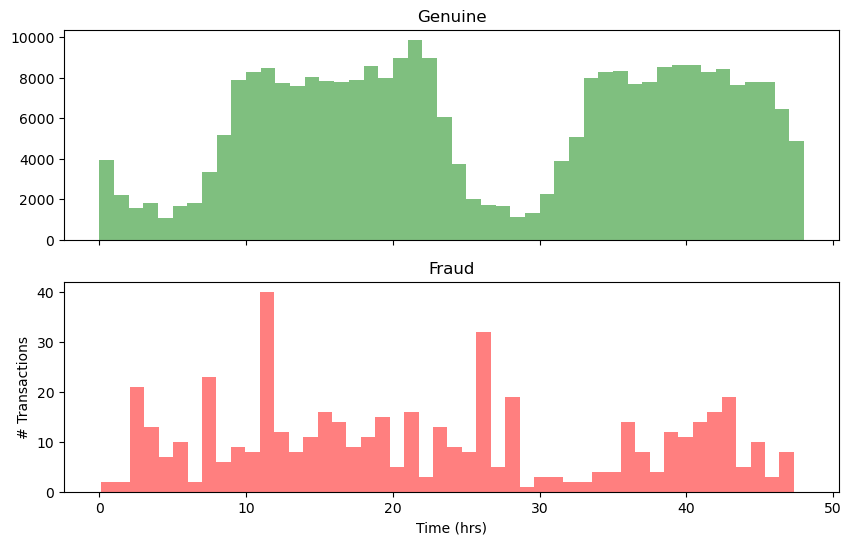

In [7]:
# Let's first check the relevance of Time column
df["Time_in_Hr"] = df["Time"]/3600          # convert Time to hours and include this hourly data in a new column
print(df["Time_in_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax1.hist(df.Time_in_Hr[df.Class==0],bins=48,color='g',alpha=0.5)           # a histogram for normal transactions
ax1.set_title('Genuine')
ax2.hist(df.Time_in_Hr[df.Class==1],bins=48,color='r',alpha=0.5)              # a histogram for fraudulent transactions
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# Transactions')

The Time column does not appear to have any pattern in distribution. It is not surprising because Time column is only measuring the time elapsed from first transaction and it is not expected to have much influence on whether the transaction is going to be normal or fraudulent. 

In [8]:
# Let's check about the Amount column
print(df.loc[df['Class'] == 1].Amount.describe())            # Description of fraudulent transaction amount
print('\n')
print(df.loc[df['Class'] == 0].Amount.describe())            # Description of normal transaction amount

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


So we can see that fraudulent transactions have a higher mean and range even though these transactions account for only 0.172% of the total dataset. It is quite likely that the transaction Amount will have predictive value. We can explore further.

Text(0, 0.5, '# transactions')

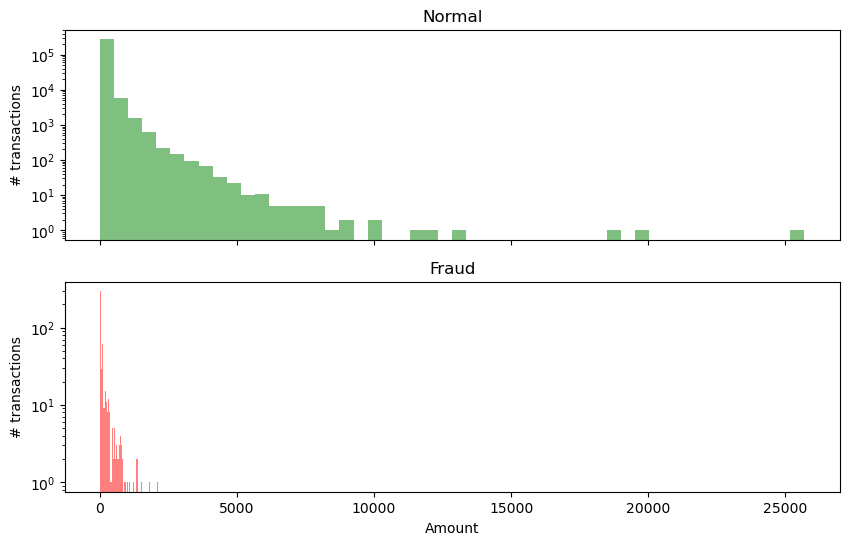

In [9]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)             # A histogram for normal transaction amount
ax3.set_yscale('log')         # to see the tails
ax3.set_title('Normal')      # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)             # A histogram for fraudulent transaction amount
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount')
ax4.set_ylabel('# transactions')

There is skewness and difference in distribution pattern in the two histograms of transaction amount as seen above. The fraudulent amount shows spikes in the histogram. Hence, Amount column is useful and is expected to have some predictive value.
So based on above analysis, we will drop the Time column and retain the Amount column.
Also, we can see that the Amount column has not been scaled/transformed in the datatset and hence we need to apply Feature Scaling to Amount column only.   

In [10]:
# Feature Scaling of Amount
from sklearn.preprocessing import StandardScaler
df['V29'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))         # The scaled Amount is now called V29

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_in_Hr,V29
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,-0.073403


The dataset now has 33 columns. We drop the Time, Time_in_Hr and unscaled Amount columns from the dataset. 

In [12]:
clean_df = df.drop(['Amount', 'Time_in_Hr', 'Time'],axis=1)

In [13]:
clean_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,V29
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


We now attempt to check for Feature Selection

In [14]:
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest(k=10)
best_features
X = clean_df.loc[:, clean_df.columns != 'Class']            # Dropping the target
y= clean_df["Class"]                                        # Including the target
fit = best_features.fit(X, y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concatenating the two dataframes for a better visualization 
featureScores = pd.concat([dfcolumns, dfscore], axis=1)
featureScores.columns = ['Features', 'Score']                #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))                    #print Top 10 features

   Features         Score
16      V17  33979.168593
13      V14  28695.547789
11      V12  20749.822361
9       V10  14057.979985
15      V16  11443.349428
2        V3  11014.508305
6        V7  10349.605408
10      V11   6999.355047
3        V4   5163.832114
17      V18   3584.380605


In [15]:
from sklearn.feature_selection import SelectKBest

best_features = SelectKBest(k=15)
best_features
X = clean_df.loc[:, clean_df.columns != 'Class']            # Dropping the target
y= clean_df["Class"]                                        # Including the target
fit = best_features.fit(X, y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concatenating the two dataframes for a better visualization 
featureScores = pd.concat([dfcolumns, dfscore], axis=1)
featureScores.columns = ['Features', 'Score']                #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))                    #print Top 15 features

   Features         Score
16      V17  33979.168593
13      V14  28695.547789
11      V12  20749.822361
9       V10  14057.979985
15      V16  11443.349428
2        V3  11014.508305
6        V7  10349.605408
10      V11   6999.355047
3        V4   5163.832114
17      V18   3584.380605
0        V1   2955.668945
8        V9   2746.600273
4        V5   2592.357929
1        V2   2393.401678
5        V6    543.510578


So we do see that some features have higher score as compared to other features. But since column names are masked and the original dataset was also transformed, we do not know what information does each column represent. So to be on a safer side, we retain all the features and proceed forward.  

# So EDA ends here. We proceed with dataset named clean_df.

# We now tackle the imbalance in the dataset

In [16]:
# Print the number of normal and fraudulent transactions 
class_names = {0:'Normal', 1:'Fraudulent'}
print(clean_df.Class.value_counts().rename(index = class_names))

Class
Normal        284315
Fraudulent       492
Name: count, dtype: int64


As already known, only 0.172% of total transactions are fraudulent. There is a major imbalance in the dataset.

# To tackle this imbalance we can either undersample the majority class or oversample the minority class. There is a drawback to both these approaches: 
1. If we undersample the majority class we will lose more than 99.8% of normal transaction from the dataset. 
2. If we oversample the minority class we will generate 283823 fraudulent transactions which actually did not happen. Such oversampling will significantly increase the size of the dataset and many models will become compuattionally intensive. 

So to handle the steep imbalance, we take a middle approach and choose both: Undersampling of majority class and Oversampling of minority class. 
So we will do random undersampling of normal transactions to reduce the size of the dataset and then apply SMOTE to the training data and oversample the fraudulent transactions. 

In [17]:
# First create two dataframes of normal and fraudulent transactions only
normal_df = clean_df[clean_df.Class == 0]
fraud_df = clean_df[clean_df.Class == 1]
print(normal_df.shape)
print(fraud_df.shape)

(284315, 30)
(492, 30)


In [18]:
# Randomly sample 100000 normal transactions
normal_sample = normal_df.sample(n=100000)
print(normal_df.shape)
print(normal_sample.shape)

(284315, 30)
(100000, 30)


In [19]:
# Concatenating the undersampled normal transactions with 492 fraudulent transactions over each other
under_sampled_df = pd.concat([normal_sample, fraud_df], axis=0)

In [20]:
under_sampled_df['Class'].value_counts()

Class
0    100000
1       492
Name: count, dtype: int64

The imbalance is now partially reduced and now 0.49% of transactions are fraudulent in the undersampled dataset.
Although the percentage is still very low but this is a major improvement over the previous value of 0.172%.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = under_sampled_df.drop(columns='Class', axis=1)               # Dataframe of features only
y = under_sampled_df['Class']                                    # Dataframe of target only
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (70344, 29)
y_train (70344,)
X_test (30148, 29)
y_test (30148,)


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
sm=SMOTE()

In [25]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [26]:
print('X_train_sm', X_train_sm.shape)
print('y_train_sm', y_train_sm.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train_sm (140000, 29)
y_train_sm (140000,)
X_test (30148, 29)
y_test (30148,)


In [27]:
y_train.value_counts()

Class
0    70000
1      344
Name: count, dtype: int64

In [28]:
y_train_sm.value_counts()

Class
0    70000
1    70000
Name: count, dtype: int64

# So the training dataset has equal number of normal (0) and fraudulent (1) transactions.

# We now proceed with Model Training.

# We will check all possible models for such type of a problem.

In [29]:
#Import the Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [30]:
# Import the performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

# Logistic Regression Model Results

In [31]:
LR_model = LogisticRegression()
LR_model.fit(X_train_sm, y_train_sm)      # Fitting Logistic Regression Model on balanced training dataset

LogisticRegression()

In [32]:
# Training Data Prediction from Logistic Regression Model
X_train_pred_LR = LR_model.predict(X_train_sm)
training_accuracy_LR = accuracy_score(X_train_pred_LR, y_train_sm)        # Training Accuracy

# Test Data Prediction from Logistic Regression Model
X_test_pred_LR = LR_model.predict(X_test)
test_accuracy_LR = accuracy_score(X_test_pred_LR, y_test)            # Test Accuracy

In [33]:
print("Logistic Regression Training Data Accuracy:  ", training_accuracy_LR, '\n', 'Logistic Regression Test Data Accuracy:  ', test_accuracy_LR)

Logistic Regression Training Data Accuracy:   0.94585 
 Logistic Regression Test Data Accuracy:   0.9773450975189067


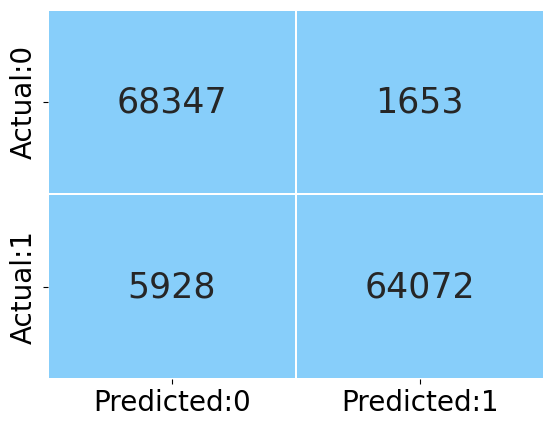

In [34]:
# Print Confusion Matrix for Logistic Regression Model (Training Data)
from matplotlib.colors import ListedColormap
cm_LR_train = confusion_matrix(y_train_sm, X_train_pred_LR)
conf_matrix_LR_train = pd.DataFrame(data = cm_LR_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_LR_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

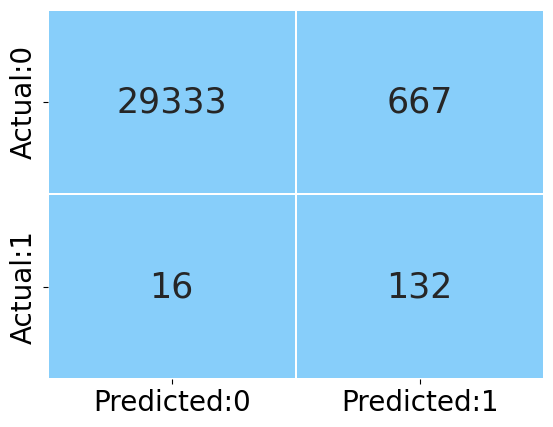

In [35]:
# Print Confusion Matrix for Logistic Regression Model (Test Data)
from matplotlib.colors import ListedColormap
cm_LR_test = confusion_matrix(y_test, X_test_pred_LR)
conf_matrix_LR_test = pd.DataFrame(data = cm_LR_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_LR_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [36]:
# Print Classification Report for Logistic Regression Model (Training Data)
class_rep_LR_train = classification_report(y_train_sm, X_train_pred_LR)
print(class_rep_LR_train)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     70000
           1       0.97      0.92      0.94     70000

    accuracy                           0.95    140000
   macro avg       0.95      0.95      0.95    140000
weighted avg       0.95      0.95      0.95    140000



In [37]:
# Print Classification Report for Logistic Regression Model (Test Data)
class_rep_LR_test = classification_report(y_test, X_test_pred_LR)
print(class_rep_LR_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     30000
           1       0.17      0.89      0.28       148

    accuracy                           0.98     30148
   macro avg       0.58      0.93      0.63     30148
weighted avg       1.00      0.98      0.99     30148



In [38]:
precision_LR = precision_score(y_test, X_test_pred_LR)
Recall_LR = recall_score(y_test, X_test_pred_LR)
ROC_LR = roc_auc_score(y_test, X_test_pred_LR)
F1_LR = f1_score(y_test, X_test_pred_LR)
print(precision_LR)
print(Recall_LR)
print(ROC_LR)
print(F1_LR)

0.16520650813516896
0.8918918918918919
0.9348292792792793
0.27877507919746564


In [39]:
score_card_LR = {'MODEL NAME' : ['Logistic Regression'], 
                  'Accuracy_Score': [test_accuracy_LR],
                 'Precision_Score': [precision_LR],
                 'Recall Score': [Recall_LR],
                 'ROC_Score': [ROC_LR],
                 'F1_Score': [F1_LR]
                }

In [40]:
LR_model = pd.DataFrame(score_card_LR)
LR_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Logistic Regression,0.977345,0.165207,0.891892,0.934829,0.278775


# Logistic Regression Model has shown mixed results with good accuracy, recall and ROC score but poor precision and F-1 score. it looks like that many normal transactions are being classified as fraud. It can also be seen that 16 fraudulent transactions have gone undetected.

# Linear Discriminant Analysis (LDA) Model Results

In [41]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_sm, y_train_sm)      # Fitting LDA Model on balanced training dataset

LinearDiscriminantAnalysis()

In [42]:
# Training Data Prediction from LDA Model
X_train_pred_LDA = LDA_model.predict(X_train_sm)
training_accuracy_LDA = accuracy_score(X_train_pred_LDA, y_train_sm)        # Training Accuracy

# Test Data Prediction from LDA Model
X_test_pred_LDA = LDA_model.predict(X_test)
test_accuracy_LDA = accuracy_score(X_test_pred_LDA, y_test)            # Test Accuracy

In [43]:
print("LDA Training Data Accuracy:  ", training_accuracy_LDA, '\n', 'LDA Test Data Accuracy:  ', test_accuracy_LDA)

LDA Training Data Accuracy:   0.9262714285714285 
 LDA Test Data Accuracy:   0.9852726549024811


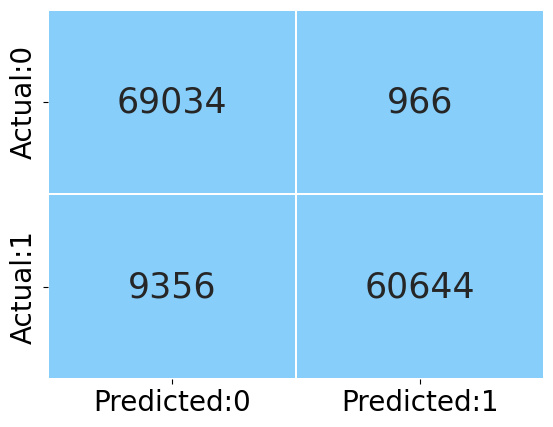

In [44]:
# Print Confusion Matrix for LDA Model (Training Data)
from matplotlib.colors import ListedColormap
cm_LDA_train = confusion_matrix(y_train_sm, X_train_pred_LDA)
conf_matrix_LDA_train = pd.DataFrame(data = cm_LDA_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_LDA_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

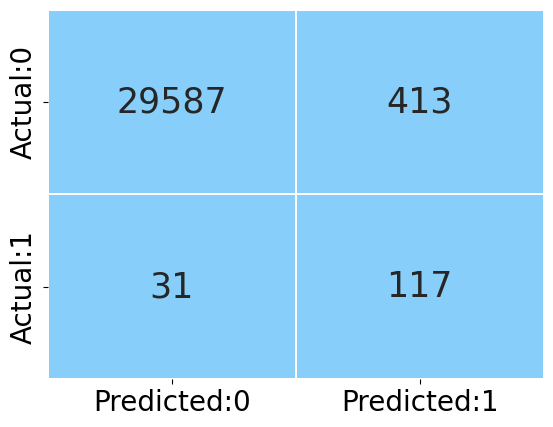

In [45]:
# Print Confusion Matrix for LDA Model (Test Data)
from matplotlib.colors import ListedColormap
cm_LDA_test = confusion_matrix(y_test, X_test_pred_LDA)
conf_matrix_LDA_test = pd.DataFrame(data = cm_LDA_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_LDA_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [46]:
# Print Classification Report for LDA Model (Training Data)
class_rep_LDA_train = classification_report(y_train_sm, X_train_pred_LDA)
print(class_rep_LDA_train)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     70000
           1       0.98      0.87      0.92     70000

    accuracy                           0.93    140000
   macro avg       0.93      0.93      0.93    140000
weighted avg       0.93      0.93      0.93    140000



In [47]:
# Print Classification Report for LDA Model (Test Data)
class_rep_LDA_test = classification_report(y_test, X_test_pred_LDA)
print(class_rep_LDA_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30000
           1       0.22      0.79      0.35       148

    accuracy                           0.99     30148
   macro avg       0.61      0.89      0.67     30148
weighted avg       1.00      0.99      0.99     30148



In [48]:
precision_LDA = precision_score(y_test, X_test_pred_LDA)
Recall_LDA = recall_score(y_test, X_test_pred_LDA)
ROC_LDA = roc_auc_score(y_test, X_test_pred_LDA)
F1_LDA = f1_score(y_test, X_test_pred_LDA)
print(precision_LDA)
print(Recall_LDA)
print(ROC_LDA)
print(F1_LDA)

0.22075471698113208
0.7905405405405406
0.8883869369369368
0.34513274336283184


In [49]:
score_card_LDA = {'MODEL NAME' : ['LDA'], 
                  'Accuracy_Score': [test_accuracy_LDA],
                 'Precision_Score': [precision_LDA],
                 'Recall Score': [Recall_LDA],
                 'ROC_Score': [ROC_LDA],
                 'F1_Score': [F1_LDA]
                }

In [50]:
LDA_model = pd.DataFrame(score_card_LDA)
LDA_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,LDA,0.985273,0.220755,0.790541,0.888387,0.345133


# LDA Model has also given mixed results with good accuracy, recall and ROC score but poor precision and F-1 score. We can say that there is Overfitting w.r.t. Precision as more than 400 normal transactions are termed as fraud. Also, 31 fraudulent transactions have gone undetected.

# KNN Model Results

In [51]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_sm, y_train_sm)         # Fitting KNN Model on balanced training dataset

KNeighborsClassifier()

In [52]:
# Training Data Prediction from KNN Model
X_train_pred_KNN = KNN_model.predict(X_train_sm)
training_accuracy_KNN = accuracy_score(X_train_pred_LDA, y_train_sm)        # Training Accuracy

# Test Data Prediction from KNN Model
X_test_pred_KNN = KNN_model.predict(X_test)
test_accuracy_KNN = accuracy_score(X_test_pred_KNN, y_test)            # Test Accuracy

In [53]:
print("KNN Training Data Accuracy:  ", training_accuracy_KNN, '\n', 'KNN Test Data Accuracy:  ', test_accuracy_KNN)

KNN Training Data Accuracy:   0.9262714285714285 
 KNN Test Data Accuracy:   0.9948918667905002


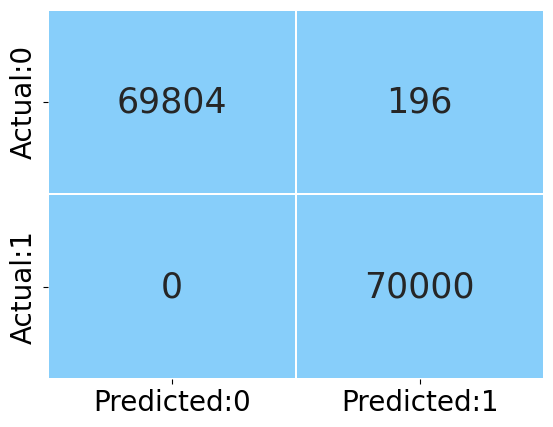

In [54]:
# Print Confusion Matrix for KNN Model (Training Data)
from matplotlib.colors import ListedColormap
cm_KNN_train = confusion_matrix(y_train_sm, X_train_pred_KNN)
conf_matrix_KNN_train = pd.DataFrame(data = cm_KNN_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_KNN_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

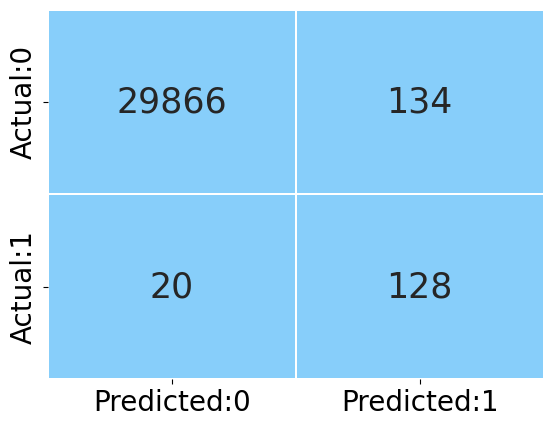

In [55]:
# Print Confusion Matrix for KNN Model (Test Data)
from matplotlib.colors import ListedColormap
cm_KNN_test = confusion_matrix(y_test, X_test_pred_KNN)
conf_matrix_KNN_test = pd.DataFrame(data = cm_KNN_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_KNN_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [56]:
# Print Classification Report for KNN Model (Training Data)
class_rep_KNN_train = classification_report(y_train_sm, X_train_pred_KNN)
print(class_rep_KNN_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70000
           1       1.00      1.00      1.00     70000

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



In [57]:
# Print Classification Report for KNN Model (Test Data)
class_rep_KNN_test = classification_report(y_test, X_test_pred_KNN)
print(class_rep_KNN_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.49      0.86      0.62       148

    accuracy                           0.99     30148
   macro avg       0.74      0.93      0.81     30148
weighted avg       1.00      0.99      1.00     30148



In [58]:
precision_KNN = precision_score(y_test, X_test_pred_KNN)
Recall_KNN = recall_score(y_test, X_test_pred_KNN)
ROC_KNN = roc_auc_score(y_test, X_test_pred_KNN)
F1_KNN = f1_score(y_test, X_test_pred_KNN)
print(precision_KNN)
print(Recall_KNN)
print(ROC_KNN)
print(F1_KNN)

0.48854961832061067
0.8648648648648649
0.9301990990990993
0.624390243902439


In [59]:
score_card_KNN = {'MODEL NAME' : ['KNN'], 
                  'Accuracy_Score': [test_accuracy_KNN],
                 'Precision_Score': [precision_KNN],
                 'Recall Score': [Recall_KNN],
                 'ROC_Score': [ROC_KNN],
                 'F1_Score': [F1_KNN]
                }

In [60]:
KNN_model = pd.DataFrame(score_card_KNN)
KNN_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,KNN,0.994892,0.48855,0.864865,0.930199,0.62439


# The results of KNN Model appear better than Logistic regression and LDA models with improvement in precision and F-1 score. However, some overfitting w.r.t. Precision is still there. 20 fraudulent transactions going undetected during testing and this number was 0 during training. 

# Naive Bayes Model Results

In [61]:
NB_model = GaussianNB()
NB_model.fit(X_train_sm, y_train_sm)          # Fitting Naive Bayes Model on balanced training dataset

GaussianNB()

In [62]:
# Training Data Prediction from NB Model
X_train_pred_NB = NB_model.predict(X_train_sm)
training_accuracy_NB = accuracy_score(X_train_pred_NB, y_train_sm)        # Training Accuracy

# Test Data Prediction from NB Model
X_test_pred_NB = NB_model.predict(X_test)
test_accuracy_NB = accuracy_score(X_test_pred_NB, y_test)            # Test Accuracy

In [63]:
print("NB Training Data Accuracy:  ", training_accuracy_NB, '\n', 'NB Test Data Accuracy:  ', test_accuracy_NB)

NB Training Data Accuracy:   0.9219642857142857 
 NB Test Data Accuracy:   0.974625182433329


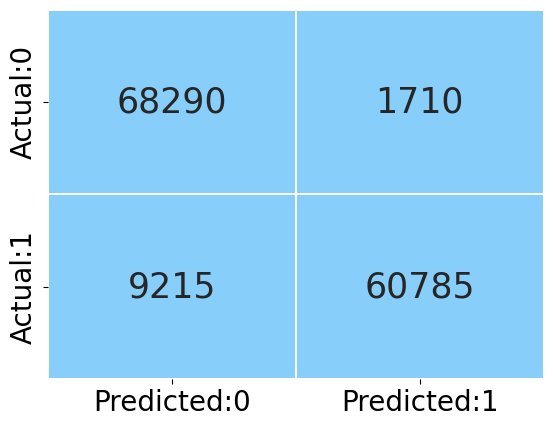

In [64]:
# Print Confusion Matrix for NB Model (Training Data)
from matplotlib.colors import ListedColormap
cm_NB_train = confusion_matrix(y_train_sm, X_train_pred_NB)
conf_matrix_NB_train = pd.DataFrame(data = cm_NB_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_NB_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

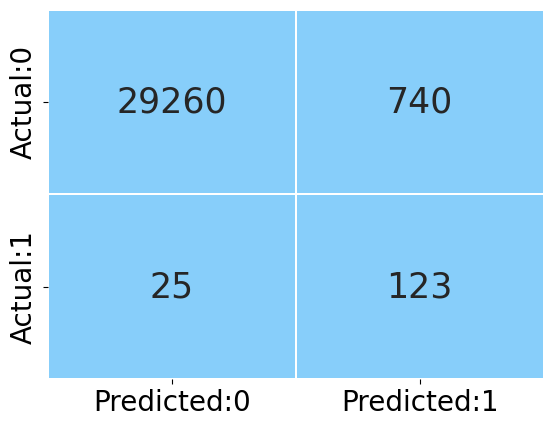

In [65]:
# Print Confusion Matrix for NB Model (Test Data)
from matplotlib.colors import ListedColormap
cm_NB_test = confusion_matrix(y_test, X_test_pred_NB)
conf_matrix_NB_test = pd.DataFrame(data = cm_NB_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_NB_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [66]:
# Print Classification Report for NB Model (Training Data)
class_rep_NB_train = classification_report(y_train_sm, X_train_pred_NB)
print(class_rep_NB_train)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     70000
           1       0.97      0.87      0.92     70000

    accuracy                           0.92    140000
   macro avg       0.93      0.92      0.92    140000
weighted avg       0.93      0.92      0.92    140000



In [67]:
# Print Classification Report for NB Model (Test Data)
class_rep_NB_test = classification_report(y_test, X_test_pred_NB)
print(class_rep_NB_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     30000
           1       0.14      0.83      0.24       148

    accuracy                           0.97     30148
   macro avg       0.57      0.90      0.62     30148
weighted avg       0.99      0.97      0.98     30148



In [68]:
precision_NB = precision_score(y_test, X_test_pred_NB)
Recall_NB = recall_score(y_test, X_test_pred_NB)
ROC_NB = roc_auc_score(y_test, X_test_pred_NB)
F1_NB = f1_score(y_test, X_test_pred_NB)
print(precision_NB)
print(Recall_NB)
print(ROC_NB)
print(F1_NB)

0.1425260718424102
0.831081081081081
0.9032072072072073
0.24332344213649854


In [69]:
score_card_NB = {'MODEL NAME' : ['Naive Bayes'], 
                  'Accuracy_Score': [test_accuracy_NB],
                 'Precision_Score': [precision_NB],
                 'Recall Score': [Recall_NB],
                 'ROC_Score': [ROC_NB],
                 'F1_Score': [F1_NB]
                }

In [70]:
NB_model = pd.DataFrame(score_card_NB)
NB_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Naive Bayes,0.974625,0.142526,0.831081,0.903207,0.243323


# The results of NB Model are also very mixed with good accuracy, recall and ROC score and poor precision and F-1 score. Also, 25 fraudulent transactions have gone undetected during testing.

# Support Vector Model Results

In [71]:
SVC_model = SVC()
SVC_model.fit(X_train_sm, y_train_sm)                 # Fitting SVC Model on balanced training dataset

SVC()

In [72]:
# Training Data Prediction from SVC Model
X_train_pred_SVC = SVC_model.predict(X_train_sm)
training_accuracy_SVC = accuracy_score(X_train_pred_SVC, y_train_sm)        # Training Accuracy

# Test Data Prediction from SVC Model
X_test_pred_SVC = SVC_model.predict(X_test)
test_accuracy_SVC = accuracy_score(X_test_pred_SVC, y_test)            # Test Accuracy

In [73]:
print("SVC Training Data Accuracy:  ", training_accuracy_SVC, '\n', 'SVC Test Data Accuracy:  ', test_accuracy_SVC)

SVC Training Data Accuracy:   0.9689214285714286 
 SVC Test Data Accuracy:   0.987030648799257


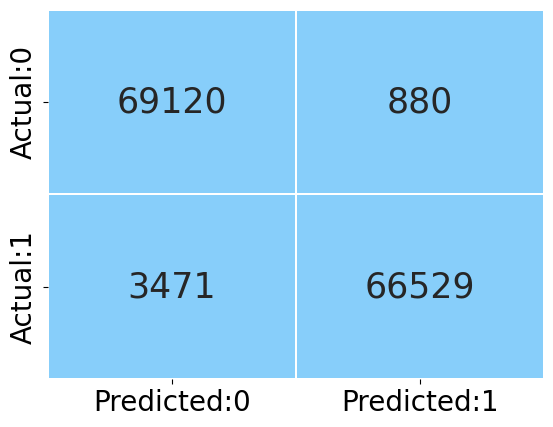

In [74]:
# Print Confusion Matrix for SVC Model (Training Data)
from matplotlib.colors import ListedColormap
cm_SVC_train = confusion_matrix(y_train_sm, X_train_pred_SVC)
conf_matrix_SVC_train = pd.DataFrame(data = cm_SVC_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_SVC_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

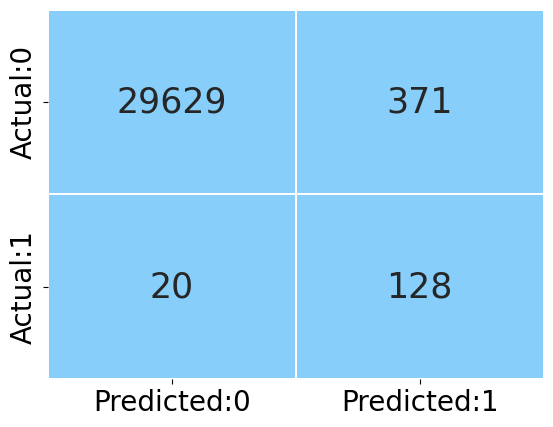

In [75]:
# Print Confusion Matrix for SVC Model (Test Data)
from matplotlib.colors import ListedColormap
cm_SVC_test = confusion_matrix(y_test, X_test_pred_SVC)
conf_matrix_SVC_test = pd.DataFrame(data = cm_SVC_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_SVC_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [76]:
# Print Classification Report for SVC Model (Training Data)
class_rep_SVC_train = classification_report(y_train_sm, X_train_pred_SVC)
print(class_rep_SVC_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     70000
           1       0.99      0.95      0.97     70000

    accuracy                           0.97    140000
   macro avg       0.97      0.97      0.97    140000
weighted avg       0.97      0.97      0.97    140000



In [77]:
# Print Classification Report for SVC Model (Test Data)
class_rep_SVC_test = classification_report(y_test, X_test_pred_SVC)
print(class_rep_SVC_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30000
           1       0.26      0.86      0.40       148

    accuracy                           0.99     30148
   macro avg       0.63      0.93      0.69     30148
weighted avg       1.00      0.99      0.99     30148



In [78]:
precision_SVC = precision_score(y_test, X_test_pred_SVC)
Recall_SVC = recall_score(y_test, X_test_pred_SVC)
ROC_SVC = roc_auc_score(y_test, X_test_pred_SVC)
F1_SVC = f1_score(y_test, X_test_pred_SVC)
print(precision_SVC)
print(Recall_SVC)
print(ROC_SVC)
print(F1_SVC)

0.2565130260521042
0.8648648648648649
0.9262490990990991
0.3956723338485316


In [79]:
score_card_SVC = {'MODEL NAME' : ['Support Vector'], 
                  'Accuracy_Score': [test_accuracy_SVC],
                 'Precision_Score': [precision_SVC],
                 'Recall Score': [Recall_SVC],
                 'ROC_Score': [ROC_SVC],
                 'F1_Score': [F1_SVC]
                }

In [80]:
SVC_model = pd.DataFrame(score_card_SVC)
SVC_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Support Vector,0.987031,0.256513,0.864865,0.926249,0.395672


# For SVC Model also, we see poor precision and F-1 score. However, training and test accuracies are nearly same. We can also see that 20 fraudulent transactions have gone undetected during testing. 

# Decision Tree Model Results

In [81]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_sm, y_train_sm)              # Fitting the Decision Tree Model on balanced training dataset

DecisionTreeClassifier()

In [82]:
# Training Data Prediction from DT Model
X_train_pred_DT = DT_model.predict(X_train_sm)
training_accuracy_DT = accuracy_score(X_train_pred_DT, y_train_sm)        # Training Accuracy

# Test Data Prediction from DT Model
X_test_pred_DT = DT_model.predict(X_test)
test_accuracy_DT = accuracy_score(X_test_pred_DT, y_test)            # Test Accuracy

In [83]:
print("DT Training Data Accuracy:  ", training_accuracy_DT, '\n', 'DT Test Data Accuracy:  ', test_accuracy_DT)

DT Training Data Accuracy:   1.0 
 DT Test Data Accuracy:   0.9941621334748574


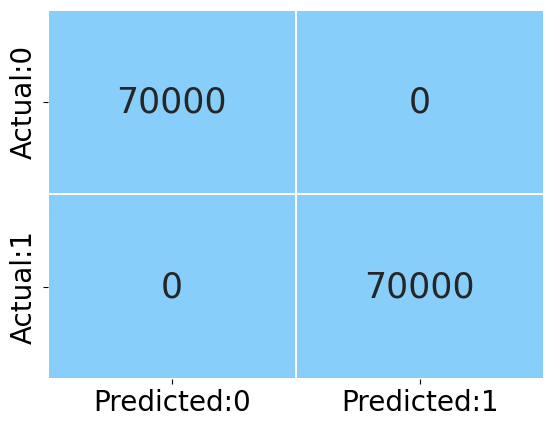

In [84]:
# Print Confusion Matrix for DT Model (Training Data)
from matplotlib.colors import ListedColormap
cm_DT_train = confusion_matrix(y_train_sm, X_train_pred_DT)
conf_matrix_DT_train = pd.DataFrame(data = cm_DT_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_DT_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

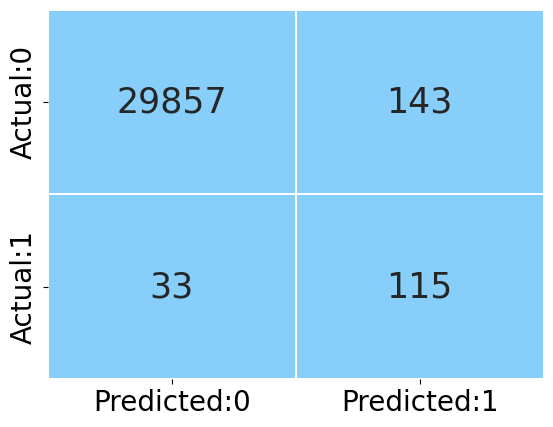

In [85]:
# Print Confusion Matrix for DT Model (Test Data)
from matplotlib.colors import ListedColormap
cm_DT_test = confusion_matrix(y_test, X_test_pred_DT)
conf_matrix_DT_test = pd.DataFrame(data = cm_DT_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_DT_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [86]:
# Print Classification Report for DT Model (Training Data)
class_rep_DT_train = classification_report(y_train_sm, X_train_pred_DT)
print(class_rep_DT_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70000
           1       1.00      1.00      1.00     70000

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



In [87]:
# Print Classification Report for DT Model (Test Data)
class_rep_DT_test = classification_report(y_test, X_test_pred_DT)
print(class_rep_DT_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.45      0.78      0.57       148

    accuracy                           0.99     30148
   macro avg       0.72      0.89      0.78     30148
weighted avg       1.00      0.99      0.99     30148



In [88]:
# Plotting the Decision Tree
from IPython.display import Image
from sklearn import tree
import pydotplus

In [89]:
feature_names = X.columns
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29'],
      dtype='object')

In [90]:
target_names = ["Fraudulent (1)", "Normal(0)"]

[Text(0.34801831755874674, 0.9827586206896551, 'V14 <= -1.888\ngini = 0.5\nsamples = 140000\nvalue = [70000, 70000]\nclass = Fraudulent (1)'),
 Text(0.08183746736292428, 0.9482758620689655, 'V4 <= -0.001\ngini = 0.056\nsamples = 63565\nvalue = [1836, 61729]\nclass = Normal(0)'),
 Text(0.07531005221932115, 0.9137931034482759, 'V17 <= -3.301\ngini = 0.214\nsamples = 876\nvalue = [769, 107]\nclass = Fraudulent (1)'),
 Text(0.0726990861618799, 0.8793103448275862, 'gini = 0.0\nsamples = 107\nvalue = [0, 107]\nclass = Normal(0)'),
 Text(0.0779210182767624, 0.8793103448275862, 'gini = 0.0\nsamples = 769\nvalue = [769, 0]\nclass = Fraudulent (1)'),
 Text(0.08836488250652741, 0.9137931034482759, 'V1 <= 1.975\ngini = 0.033\nsamples = 62689\nvalue = [1067, 61622]\nclass = Normal(0)'),
 Text(0.0831429503916449, 0.8793103448275862, 'V10 <= 1.108\ngini = 0.026\nsamples = 62427\nvalue = [823, 61604]\nclass = Normal(0)'),
 Text(0.08053198433420365, 0.8448275862068966, 'V14 <= -3.632\ngini = 0.022\nsam

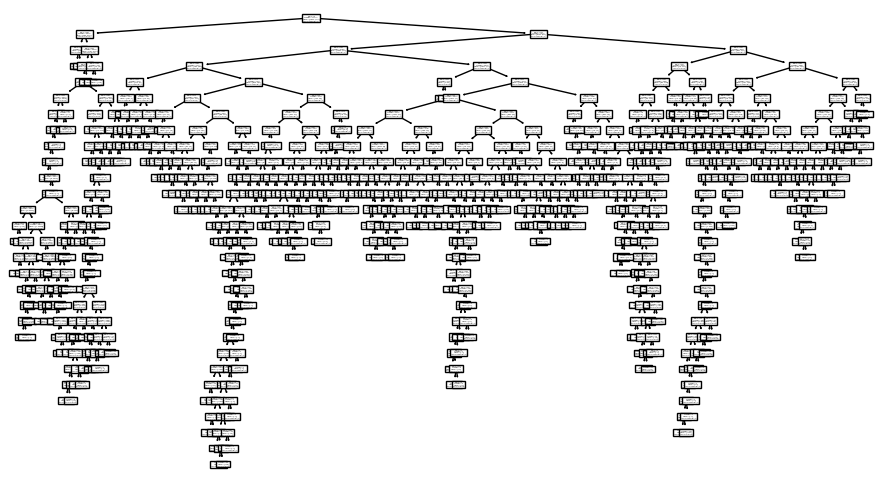

In [91]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize=(11,6))
plot_tree(DT_model, feature_names=feature_names, class_names=target_names)

In [92]:
precision_DT = precision_score(y_test, X_test_pred_DT)
Recall_DT = recall_score(y_test, X_test_pred_DT)
ROC_DT = roc_auc_score(y_test, X_test_pred_DT)
F1_DT = f1_score(y_test, X_test_pred_DT)
print(precision_DT)
print(Recall_DT)
print(ROC_DT)
print(F1_DT)

0.44573643410852715
0.777027027027027
0.8861301801801802
0.566502463054187


In [93]:
score_card_DT = {'MODEL NAME' : ['Decision Tree'], 
                  'Accuracy_Score': [test_accuracy_DT],
                 'Precision_Score': [precision_DT],
                 'Recall Score': [Recall_DT],
                 'ROC_Score': [ROC_DT],
                 'F1_Score': [F1_DT]
                }

In [94]:
DT_model = pd.DataFrame(score_card_DT)
DT_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Decision Tree,0.994162,0.445736,0.777027,0.88613,0.566502


# The results of Decision Tree Model show better metrics and training and test accuracies are nearly same and ~1. Some overfitting can be seen as 31 fraudulent transactions have gone undetected during testing and this number was 0 during training.

#  Random Forest Classifier Results

In [95]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_sm, y_train_sm)               # Fitting the Random Forest Model on balanced training dataset

RandomForestClassifier()

In [96]:
# Training Data Prediction from RFC Model
X_train_pred_RFC = RFC_model.predict(X_train_sm)
training_accuracy_RFC = accuracy_score(X_train_pred_RFC, y_train_sm)        # Training Accuracy

# Test Data Prediction from RFC Model
X_test_pred_RFC = RFC_model.predict(X_test)
test_accuracy_RFC = accuracy_score(X_test_pred_RFC, y_test)            # Test Accuracy

In [97]:
print("RFC Training Data Accuracy:  ", training_accuracy_RFC, '\n', 'RFC Test Data Accuracy:  ', test_accuracy_RFC)

RFC Training Data Accuracy:   1.0 
 RFC Test Data Accuracy:   0.9988722303303702


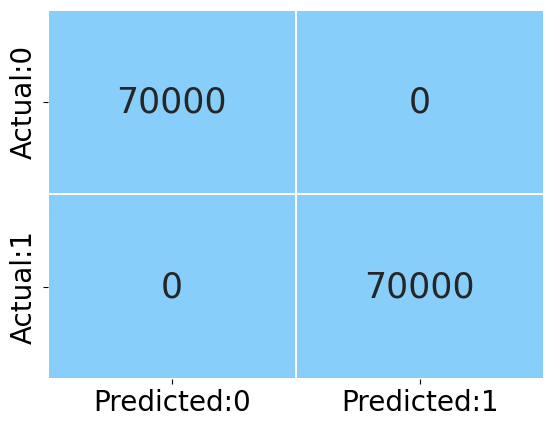

In [98]:
# Print Confusion Matrix for RFC Model (Training Data)
from matplotlib.colors import ListedColormap
cm_RFC_train = confusion_matrix(y_train_sm, X_train_pred_RFC)
conf_matrix_RFC_train = pd.DataFrame(data = cm_RFC_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_RFC_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

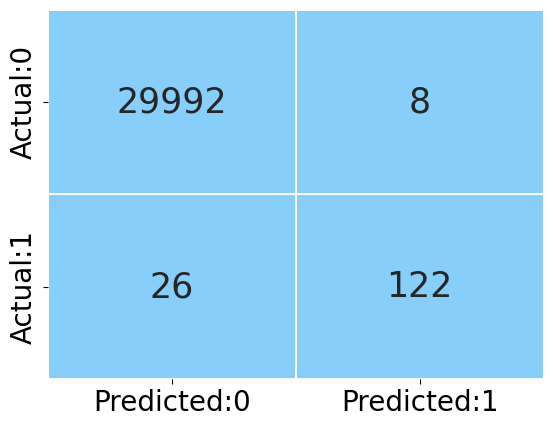

In [99]:
# Print Confusion Matrix for RFC Model (Test Data)
from matplotlib.colors import ListedColormap
cm_RFC_test = confusion_matrix(y_test, X_test_pred_RFC)
conf_matrix_RFC_test = pd.DataFrame(data = cm_RFC_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_RFC_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [100]:
# Print Classification Report for RFC Model (Training Data)
class_rep_RFC_train = classification_report(y_train_sm, X_train_pred_RFC)
print(class_rep_RFC_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70000
           1       1.00      1.00      1.00     70000

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



In [101]:
# Print Classification Report for RFC Model (Test Data)
class_rep_RFC_test = classification_report(y_test, X_test_pred_RFC)
print(class_rep_RFC_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.94      0.82      0.88       148

    accuracy                           1.00     30148
   macro avg       0.97      0.91      0.94     30148
weighted avg       1.00      1.00      1.00     30148



In [102]:
precision_RFC = precision_score(y_test, X_test_pred_RFC)
Recall_RFC = recall_score(y_test, X_test_pred_RFC)
ROC_RFC = roc_auc_score(y_test, X_test_pred_RFC)
F1_RFC = f1_score(y_test, X_test_pred_RFC)
print(precision_RFC)
print(Recall_RFC)
print(ROC_RFC)
print(F1_RFC)

0.9384615384615385
0.8243243243243243
0.9120288288288289
0.8776978417266187


In [103]:
score_card_RFC = {'MODEL NAME' : ['Random Forest'], 
                  'Accuracy_Score': [test_accuracy_RFC],
                 'Precision_Score': [precision_RFC],
                 'Recall Score': [Recall_RFC],
                 'ROC_Score': [ROC_RFC],
                 'F1_Score': [F1_RFC]
                }

In [104]:
RFC_model = pd.DataFrame(score_card_RFC)
RFC_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Random Forest,0.998872,0.938462,0.824324,0.912029,0.877698


# The results of Random Forest Model are quite good as all the metrics are above 0.8. However, still 26 fraudulent transactions have gone undetected during testing. 

# ADA Boost Classifier Model Results

In [105]:
ADA_model = AdaBoostClassifier()
ADA_model.fit(X_train_sm, y_train_sm)                 # Fitting the ADA Boost on balanced training dataset

AdaBoostClassifier()

In [106]:
# Training Data Prediction from ADA Boost Model
X_train_pred_ADA = ADA_model.predict(X_train_sm)
training_accuracy_ADA = accuracy_score(X_train_pred_ADA, y_train_sm)        # Training Accuracy

# Test Data Prediction from ADA Boost Model
X_test_pred_ADA = ADA_model.predict(X_test)
test_accuracy_ADA = accuracy_score(X_test_pred_ADA, y_test)            # Test Accuracy

In [107]:
print("ADA Boost Training Data Accuracy:  ", training_accuracy_ADA, '\n', 'ADA Boost Test Data Accuracy:  ', test_accuracy_ADA)

ADA Boost Training Data Accuracy:   0.9714785714285714 
 ADA Boost Test Data Accuracy:   0.9762504975454425


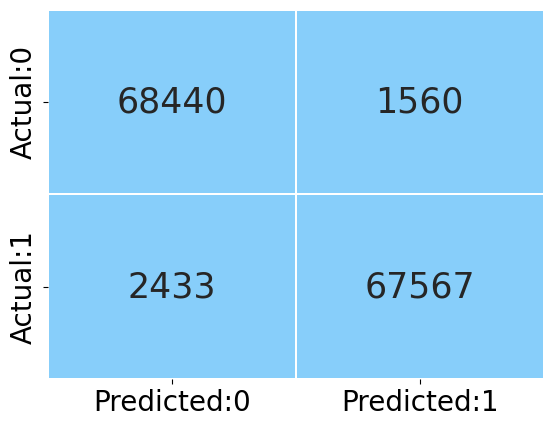

In [108]:
# Print Confusion Matrix for ADA Boost Model (Training Data)
from matplotlib.colors import ListedColormap
cm_ADA_train = confusion_matrix(y_train_sm, X_train_pred_ADA)
conf_matrix_ADA_train = pd.DataFrame(data = cm_ADA_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_ADA_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

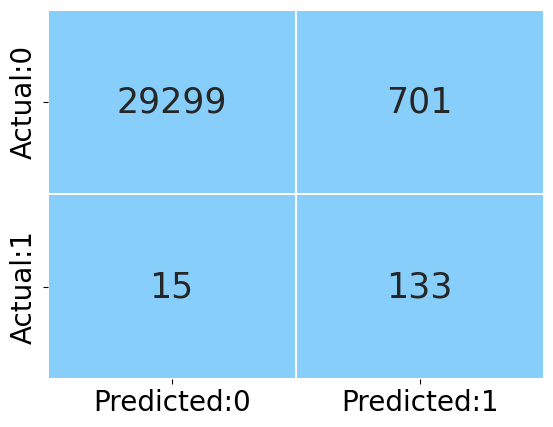

In [109]:
# Print Confusion Matrix for ADA Boost Model (Test Data)
from matplotlib.colors import ListedColormap
cm_ADA_test = confusion_matrix(y_test, X_test_pred_ADA)
conf_matrix_ADA_test = pd.DataFrame(data = cm_ADA_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_ADA_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [110]:
# Print Classification Report for ADA Boost Model (Training Data)
class_rep_ADA_train = classification_report(y_train_sm, X_train_pred_ADA)
print(class_rep_ADA_train)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     70000
           1       0.98      0.97      0.97     70000

    accuracy                           0.97    140000
   macro avg       0.97      0.97      0.97    140000
weighted avg       0.97      0.97      0.97    140000



In [111]:
# Print Classification Report for ADA Boost Model (Test Data)
class_rep_ADA_test = classification_report(y_test, X_test_pred_ADA)
print(class_rep_ADA_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     30000
           1       0.16      0.90      0.27       148

    accuracy                           0.98     30148
   macro avg       0.58      0.94      0.63     30148
weighted avg       1.00      0.98      0.98     30148



In [112]:
precision_ADA = precision_score(y_test, X_test_pred_ADA)
Recall_ADA = recall_score(y_test, X_test_pred_ADA)
ROC_ADA = roc_auc_score(y_test, X_test_pred_ADA)
F1_ADA = f1_score(y_test, X_test_pred_ADA)
print(precision_ADA)
print(Recall_ADA)
print(ROC_ADA)
print(F1_ADA)

0.15947242206235013
0.8986486486486487
0.9376409909909911
0.27087576374745426


In [113]:
score_card_ADA = {'MODEL NAME' : ['ADA Boost'], 
                  'Accuracy_Score': [test_accuracy_ADA],
                 'Precision_Score': [precision_ADA],
                 'Recall Score': [Recall_ADA],
                 'ROC_Score': [ROC_ADA],
                 'F1_Score': [F1_ADA]
                }

In [114]:
ADA_model = pd.DataFrame(score_card_ADA)
ADA_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,ADA Boost,0.97625,0.159472,0.898649,0.937641,0.270876


# The results of ADA Boost Model show poor precision and F-1 score but very good accuracy, recall and ROC score. The number of undetected fraudulent transactions has come to 15. 

# Gradient Boost Classifier Model Results

In [115]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_sm, y_train_sm)                    # Fitting the Gradient Boost on balanced training dataset

GradientBoostingClassifier()

In [116]:
# Training Data Prediction from Gradient Boost Model
X_train_pred_GB = GB_model.predict(X_train_sm)
training_accuracy_GB = accuracy_score(X_train_pred_GB, y_train_sm)        # Training Accuracy

# Test Data Prediction from Gradient Boost Model
X_test_pred_GB = GB_model.predict(X_test)
test_accuracy_GB = accuracy_score(X_test_pred_GB, y_test)            # Test Accuracy

In [117]:
print("Gradient Boost Training Data Accuracy:  ", training_accuracy_GB, '\n', 'Gradient Boost Test Data Accuracy:  ', test_accuracy_GB)

Gradient Boost Training Data Accuracy:   0.9856 
 Gradient Boost Test Data Accuracy:   0.9862014063951174


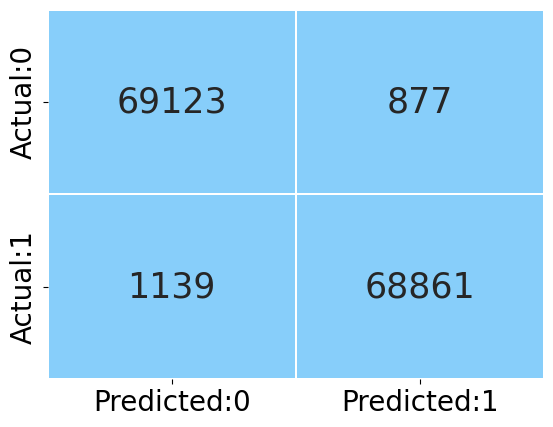

In [118]:
# Print Confusion Matrix for Gradient Boost Model (Training Data)
from matplotlib.colors import ListedColormap
cm_GB_train = confusion_matrix(y_train_sm, X_train_pred_GB)
conf_matrix_GB_train = pd.DataFrame(data = cm_GB_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_GB_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

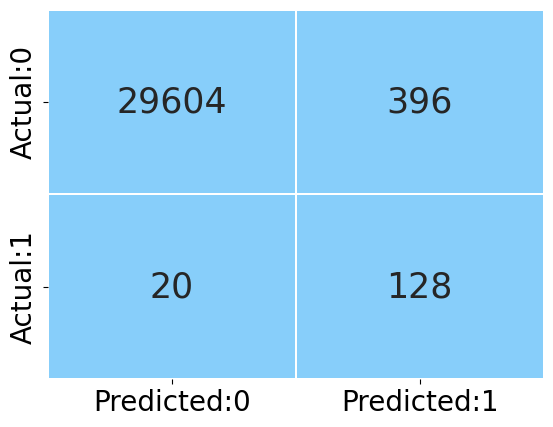

In [119]:
# Print Confusion Matrix for Gradient Boost Model (Test Data)
from matplotlib.colors import ListedColormap
cm_GB_test = confusion_matrix(y_test, X_test_pred_GB)
conf_matrix_GB_test = pd.DataFrame(data = cm_GB_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_GB_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [120]:
# Print Classification Report for Gradient Boost Model (Training Data)
class_rep_GB_train = classification_report(y_train_sm, X_train_pred_GB)
print(class_rep_GB_train)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     70000
           1       0.99      0.98      0.99     70000

    accuracy                           0.99    140000
   macro avg       0.99      0.99      0.99    140000
weighted avg       0.99      0.99      0.99    140000



In [121]:
# Print Classification Report for Gradient Boost Model (Test Data)
class_rep_GB_test = classification_report(y_test, X_test_pred_GB)
print(class_rep_GB_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30000
           1       0.24      0.86      0.38       148

    accuracy                           0.99     30148
   macro avg       0.62      0.93      0.69     30148
weighted avg       1.00      0.99      0.99     30148



In [122]:
precision_GB = precision_score(y_test, X_test_pred_GB)
Recall_GB = recall_score(y_test, X_test_pred_GB)
ROC_GB = roc_auc_score(y_test, X_test_pred_GB)
F1_GB = f1_score(y_test, X_test_pred_GB)
print(precision_GB)
print(Recall_GB)
print(ROC_GB)
print(F1_GB)

0.24427480916030533
0.8648648648648649
0.9258324324324324
0.380952380952381


In [123]:
score_card_GB = {'MODEL NAME' : ['Gradient Boost'], 
                  'Accuracy_Score': [test_accuracy_GB],
                 'Precision_Score': [precision_GB],
                 'Recall Score': [Recall_GB],
                 'ROC_Score': [ROC_GB],
                 'F1_Score': [F1_GB]
                }

In [124]:
GB_model = pd.DataFrame(score_card_GB)
GB_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Gradient Boost,0.986201,0.244275,0.864865,0.925832,0.380952


# The results of Gradient Boost Model are almost similar to ADA Boost model with slight improvement in precision and F-1 score. The Recall is also nearly same as undetected fraudulent transactions = 20.

# XGBoost Results

In [125]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train_sm, y_train_sm)                    # Fitting the XG Boost on balanced training dataset

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [126]:
# Training Data Prediction from XG Boost Model
X_train_pred_XGB = XGB_model.predict(X_train_sm)
training_accuracy_XGB = accuracy_score(X_train_pred_XGB, y_train_sm)        # Training Accuracy

# Test Data Prediction from XG Boost Model
X_test_pred_XGB = XGB_model.predict(X_test)
test_accuracy_XGB = accuracy_score(X_test_pred_XGB, y_test)            # Test Accuracy

In [127]:
print("XG Boost Training Data Accuracy:  ", training_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy:  ', test_accuracy_XGB)

XG Boost Training Data Accuracy:   1.0 
 XG Boost Test Data Accuracy:   0.9982088364070585


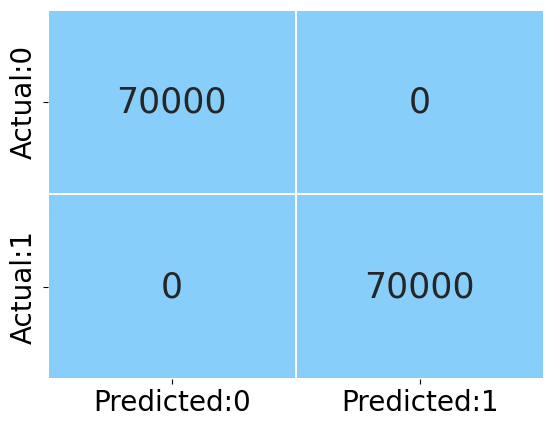

In [128]:
# Print Confusion Matrix for XG Boost Model (Training Data)
from matplotlib.colors import ListedColormap
cm_XGB_train = confusion_matrix(y_train_sm, X_train_pred_XGB)
conf_matrix_XGB_train = pd.DataFrame(data = cm_XGB_train, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_XGB_train, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

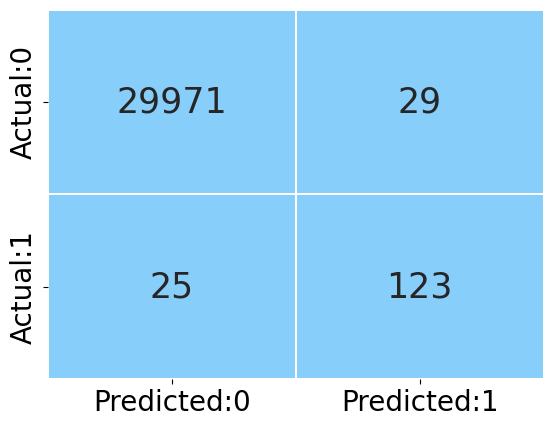

In [129]:
# Print Confusion Matrix for XG Boost Model (Test Data)
from matplotlib.colors import ListedColormap
cm_XGB_test = confusion_matrix(y_test, X_test_pred_XGB)
conf_matrix_XGB_test = pd.DataFrame(data = cm_XGB_test, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_XGB_test, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [130]:
# Print Classification Report for XG Boost Model (Training Data)
class_rep_XGB_train = classification_report(y_train_sm, X_train_pred_XGB)
print(class_rep_XGB_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70000
           1       1.00      1.00      1.00     70000

    accuracy                           1.00    140000
   macro avg       1.00      1.00      1.00    140000
weighted avg       1.00      1.00      1.00    140000



In [131]:
# Print Classification Report for XG Boost Model (Test Data)
class_rep_XGB_test = classification_report(y_test, X_test_pred_XGB)
print(class_rep_XGB_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30000
           1       0.81      0.83      0.82       148

    accuracy                           1.00     30148
   macro avg       0.90      0.92      0.91     30148
weighted avg       1.00      1.00      1.00     30148



In [132]:
precision_XGB = precision_score(y_test, X_test_pred_XGB)
Recall_XGB = recall_score(y_test, X_test_pred_XGB)
ROC_XGB = roc_auc_score(y_test, X_test_pred_XGB)
F1_XGB = f1_score(y_test, X_test_pred_XGB)
print(precision_XGB)
print(Recall_XGB)
print(ROC_XGB)
print(F1_XGB)

0.8092105263157895
0.831081081081081
0.9150572072072072
0.82


In [133]:
score_card_XGB = {'MODEL NAME' : ['XG Boost'], 
                  'Accuracy_Score': [test_accuracy_XGB],
                 'Precision_Score': [precision_XGB],
                 'Recall Score': [Recall_XGB],
                 'ROC_Score': [ROC_XGB],
                 'F1_Score': [F1_XGB]
                }

In [134]:
XGB_model = pd.DataFrame(score_card_XGB)
XGB_model

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,XG Boost,0.998209,0.809211,0.831081,0.915057,0.82


# The results of XG Boost Model are very good as all metrics show a value above 0.8. However, the number of undetected fraudulent transactions = 25 which was 0 during training. So, no model has shown us a Recall = 1.

# We do a relative comparison fo all the models. Let's tabulate the comparison of all the Models

In [135]:
Model_Score_Card = pd.concat([LR_model, LDA_model, KNN_model, NB_model, SVC_model, DT_model, RFC_model, ADA_model, GB_model, XGB_model], axis=0)

In [136]:
Model_Score_Card

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,Logistic Regression,0.977345,0.165207,0.891892,0.934829,0.278775
0,LDA,0.985273,0.220755,0.790541,0.888387,0.345133
0,KNN,0.994892,0.488550,0.864865,0.930199,0.624390
0,Naive Bayes,0.974625,0.142526,0.831081,0.903207,0.243323
0,Support Vector,0.987031,0.256513,0.864865,0.926249,0.395672
0,Decision Tree,0.994162,0.445736,0.777027,0.886130,0.566502
0,Random Forest,0.998872,0.938462,0.824324,0.912029,0.877698
0,ADA Boost,0.976250,0.159472,0.898649,0.937641,0.270876
0,Gradient Boost,0.986201,0.244275,0.864865,0.925832,0.380952
0,XG Boost,0.998209,0.809211,0.831081,0.915057,0.820000


In [137]:
Model_Score_Card['Total'] = Model_Score_Card.sum(axis=1, numeric_only=True)

In [138]:
Model_Score_Card

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score,Total
0,Logistic Regression,0.977345,0.165207,0.891892,0.934829,0.278775,3.248048
0,LDA,0.985273,0.220755,0.790541,0.888387,0.345133,3.230088
0,KNN,0.994892,0.488550,0.864865,0.930199,0.624390,3.902896
0,Naive Bayes,0.974625,0.142526,0.831081,0.903207,0.243323,3.094763
0,Support Vector,0.987031,0.256513,0.864865,0.926249,0.395672,3.430330
0,Decision Tree,0.994162,0.445736,0.777027,0.886130,0.566502,3.669558
0,Random Forest,0.998872,0.938462,0.824324,0.912029,0.877698,4.551385
0,ADA Boost,0.976250,0.159472,0.898649,0.937641,0.270876,3.242888
0,Gradient Boost,0.986201,0.244275,0.864865,0.925832,0.380952,3.402126
0,XG Boost,0.998209,0.809211,0.831081,0.915057,0.820000,4.373558


# It is clear that Random Forest and XGBoost models are best performing with least Overfitting. However, these two models had a training recall of 1 but did not give a recall of 1 on test data. 

# Let's try hyperparameter tuning on XGBoost model.

In [139]:
from sklearn.model_selection import GridSearchCV, KFold

In [145]:
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=kfold)
grid_result = grid.fit(X_train_sm, y_train_sm)


In [146]:
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.999160 using {'max_depth': 5, 'n_estimators': 1000}
#9 0.977955 (0.002034) with: {'max_depth': 2, 'n_estimators': 20}
#6 0.994414 (0.000905) with: {'max_depth': 2, 'n_estimators': 180}
#4 0.998859 (0.000295) with: {'max_depth': 2, 'n_estimators': 1000}
#8 0.982865 (0.001621) with: {'max_depth': 3, 'n_estimators': 20}
#5 0.998333 (0.000468) with: {'max_depth': 3, 'n_estimators': 180}
#2 0.999087 (0.000344) with: {'max_depth': 3, 'n_estimators': 1000}
#7 0.991310 (0.001208) with: {'max_depth': 5, 'n_estimators': 20}
#3 0.999003 (0.000340) with: {'max_depth': 5, 'n_estimators': 180}
#1 0.999160 (0.000301) with: {'max_depth': 5, 'n_estimators': 1000}


In [153]:
# Prepare model after Tuning
XGB_model_tuned = xgb.XGBClassifier(max_depth= 5, n_estimators = 1000)
XGB_model_tuned.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [154]:
# Test Data Prediction from XG Boost Model after Tuning
X_test_pred_XGB_tuned = XGB_model_tuned.predict(X_test)
test_accuracy_XGB_tuned = accuracy_score(X_test_pred_XGB_tuned, y_test)            # Test Accuracy

In [155]:
print("XG Boost Training Data Accuracy:  ", training_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy:  ', test_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy after Tuning:  ', test_accuracy_XGB_tuned)

XG Boost Training Data Accuracy:   1.0 
 XG Boost Test Data Accuracy:   0.9982088364070585 
 XG Boost Test Data Accuracy after Tuning:   0.9985073636725488


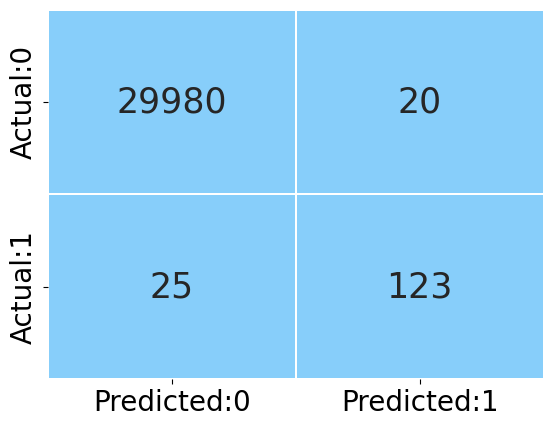

In [156]:
# Print Confusion Matrix for XG Boost Model after Tuning (Test Data)
from matplotlib.colors import ListedColormap
cm_XGB_test_tuned = confusion_matrix(y_test, X_test_pred_XGB_tuned)
conf_matrix_XGB_test_tuned = pd.DataFrame(data = cm_XGB_test_tuned, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_XGB_test_tuned, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [157]:
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_sm, y_train_sm)

In [158]:
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.999579 using {'max_depth': 5, 'n_estimators': 1000}
#9 0.957364 (0.002098) with: {'max_depth': 2, 'n_estimators': 20}
#6 0.995914 (0.000579) with: {'max_depth': 2, 'n_estimators': 180}
#4 0.999429 (0.000150) with: {'max_depth': 2, 'n_estimators': 1000}
#8 0.972207 (0.001862) with: {'max_depth': 3, 'n_estimators': 20}
#5 0.999143 (0.000243) with: {'max_depth': 3, 'n_estimators': 180}
#2 0.999543 (0.000173) with: {'max_depth': 3, 'n_estimators': 1000}
#7 0.990036 (0.001114) with: {'max_depth': 5, 'n_estimators': 20}
#3 0.999500 (0.000175) with: {'max_depth': 5, 'n_estimators': 180}
#1 0.999579 (0.000155) with: {'max_depth': 5, 'n_estimators': 1000}


In [159]:
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=kfold)
grid_result = grid.fit(X_train_sm, y_train_sm)

In [160]:
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 1.000000 using {'max_depth': 2, 'n_estimators': 1000}
#9 0.935830 (0.003916) with: {'max_depth': 2, 'n_estimators': 20}
#6 0.997427 (0.000820) with: {'max_depth': 2, 'n_estimators': 180}
#1 1.000000 (0.000000) with: {'max_depth': 2, 'n_estimators': 1000}
#8 0.961161 (0.002820) with: {'max_depth': 3, 'n_estimators': 20}
#5 0.999957 (0.000065) with: {'max_depth': 3, 'n_estimators': 180}
#1 1.000000 (0.000000) with: {'max_depth': 3, 'n_estimators': 1000}
#7 0.988742 (0.001171) with: {'max_depth': 5, 'n_estimators': 20}
#1 1.000000 (0.000000) with: {'max_depth': 5, 'n_estimators': 180}
#1 1.000000 (0.000000) with: {'max_depth': 5, 'n_estimators': 1000}


In [162]:
n_estimators = [20,180,1000]
max_depth= [2, 3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=kfold)
grid_result = grid.fit(X_train_sm, y_train_sm)

In [163]:
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.999580 using {'max_depth': 5, 'n_estimators': 1000}
#9 0.956423 (0.002163) with: {'max_depth': 2, 'n_estimators': 20}
#6 0.995918 (0.000598) with: {'max_depth': 2, 'n_estimators': 180}
#4 0.999429 (0.000148) with: {'max_depth': 2, 'n_estimators': 1000}
#8 0.971891 (0.001960) with: {'max_depth': 3, 'n_estimators': 20}
#5 0.999144 (0.000240) with: {'max_depth': 3, 'n_estimators': 180}
#2 0.999543 (0.000172) with: {'max_depth': 3, 'n_estimators': 1000}
#7 0.990024 (0.001102) with: {'max_depth': 5, 'n_estimators': 20}
#3 0.999501 (0.000170) with: {'max_depth': 5, 'n_estimators': 180}
#1 0.999580 (0.000150) with: {'max_depth': 5, 'n_estimators': 1000}


In [167]:
# Prepare model after Tuning
XGB_model_tuned = xgb.XGBClassifier(max_depth= 2, n_estimators = 1000)
XGB_model_tuned.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
# Test Data Prediction from XG Boost Model after Tuning
X_test_pred_XGB_tuned = XGB_model_tuned.predict(X_test)
test_accuracy_XGB_tuned = accuracy_score(X_test_pred_XGB_tuned, y_test)            # Test Accuracy

In [169]:
print("XG Boost Training Data Accuracy:  ", training_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy:  ', test_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy after Tuning:  ', test_accuracy_XGB_tuned)

XG Boost Training Data Accuracy:   1.0 
 XG Boost Test Data Accuracy:   0.9982088364070585 
 XG Boost Test Data Accuracy after Tuning:   0.998009818230065


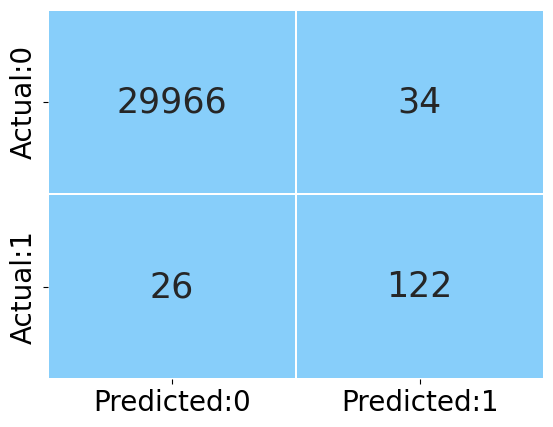

In [170]:
# Print Confusion Matrix for XG Boost Model after Tuning (Test Data)
from matplotlib.colors import ListedColormap
cm_XGB_test_tuned = confusion_matrix(y_test, X_test_pred_XGB_tuned)
conf_matrix_XGB_test_tuned = pd.DataFrame(data = cm_XGB_test_tuned, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_XGB_test_tuned, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [171]:
# Prepare model after Tuning
XGB_model_tuned = xgb.XGBClassifier(max_depth= 5, n_estimators = 1000)
XGB_model_tuned.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [172]:
# Test Data Prediction from XG Boost Model after Tuning
X_test_pred_XGB_tuned = XGB_model_tuned.predict(X_test)
test_accuracy_XGB_tuned = accuracy_score(X_test_pred_XGB_tuned, y_test)            # Test Accuracy

In [173]:
print("XG Boost Training Data Accuracy:  ", training_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy:  ', test_accuracy_XGB, '\n', 'XG Boost Test Data Accuracy after Tuning:  ', test_accuracy_XGB_tuned)

XG Boost Training Data Accuracy:   1.0 
 XG Boost Test Data Accuracy:   0.9982088364070585 
 XG Boost Test Data Accuracy after Tuning:   0.9985073636725488


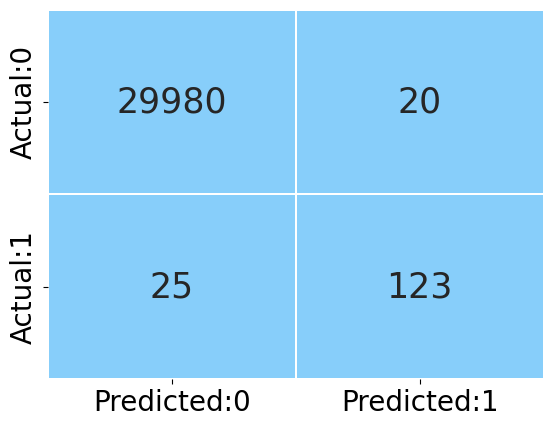

In [174]:
# Print Confusion Matrix for XG Boost Model after Tuning (Test Data)
from matplotlib.colors import ListedColormap
cm_XGB_test_tuned = confusion_matrix(y_test, X_test_pred_XGB_tuned)
conf_matrix_XGB_test_tuned = pd.DataFrame(data = cm_XGB_test_tuned, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix_XGB_test_tuned, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']), cbar=False,
           linewidths=0.1, annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [175]:
precision_XGB_tuned = precision_score(y_test, X_test_pred_XGB_tuned)
Recall_XGB_tuned = recall_score(y_test, X_test_pred_XGB_tuned)
ROC_XGB_tuned = roc_auc_score(y_test, X_test_pred_XGB_tuned)
F1_XGB_tuned = f1_score(y_test, X_test_pred_XGB_tuned)
print(precision_XGB_tuned)
print(Recall_XGB_tuned)
print(ROC_XGB_tuned)
print(F1_XGB_tuned)

0.8601398601398601
0.831081081081081
0.9152072072072072
0.8453608247422679


In [177]:
score_card_XGB_tuned = {'MODEL NAME' : ['XG Boost Tuned'], 
                  'Accuracy_Score': [test_accuracy_XGB_tuned],
                 'Precision_Score': [precision_XGB_tuned],
                 'Recall Score': [Recall_XGB_tuned],
                 'ROC_Score': [ROC_XGB_tuned],
                 'F1_Score': [F1_XGB_tuned]
                }

In [179]:
XGB_model_tuned = pd.DataFrame(score_card_XGB_tuned)
XGB_model_tuned

,MODEL NAME,Accuracy_Score,Precision_Score,Recall Score,ROC_Score,F1_Score
0,XG Boost Tuned,0.998507,0.86014,0.831081,0.915207,0.845361


# After hyperparameter tunint, we have improved Precision & F-1 score further.